The approval, disapproval and dropout rates comprise a group called "school performance rates", where each one represents a percentage of total enrollment or remaining enrolled students (final balance of initial enrollment), considering the situations of transfers, admissions and reclassifications (entry and exit).

\begin{equation}
\text {ApprovalRate}_{y}=\frac{Approved_{y}}{Remaining_{y}} \times 100
\tag{1}
\end{equation}

\begin{equation}
\text {DisapprovalRate}_{y}=\frac{Disapproved_{y}}{Remaining_{y}} \times 100
\tag{2}
\end{equation}

\begin{equation}
\text {DropoutRate}_{y}=100 - ({ApprovalRate}_{y} - {DisapprovalRate}_{y})
\tag{3}
\end{equation}

$Approved_{y} =$ number of approved students in the year or group of years $y$;<br />
$Disapproved_{y} =$ number of disapproved students in the year or group of years $y$;<br />
$M_{y}=$ matrícula inicial na série ou grupo de séries $y ;$<br />
$AF_{y}=$ afastados por abandono ou transferência na série ou grupo de séries $y$;<br />
$AD_{y}=$ admitidos por transferência na série ou grupo de séries $y$<br />
$REC_{y}=$ Reclassificados para a série ou grupo de séries $y$;<br />
$DES_{y}=$ alunos que saíram da série ou grupo de séries $y$, por reclassificação;<br />
$Remaining_{y} =$ $M_{y}-AF_{y}+AD_{y}+REC_{y}-DES_{y}$.<br />
(number of remaining students in the year or group of years $y$)<br /><br />

where:<br />
$y=$ elementary school (year, $1^{\mathrm{st}}$ to $4^{\mathrm{th}}, 5^{\mathrm{th}}$ to $9^{\mathrm{th}}$, total), high school (year, total).

Reference for INEP Rates formulas: <https://download.inep.gov.br/publicacoes/institucionais/estatisticas_e_indicadores/dicionario_de_indicadores_educacionais_formulas_de_calculo.pdf>


### RQ5. Did the pandemic increase the school dropout rate?

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data of all available years of School Dropout Rates

In [8]:
data = pd.read_csv('data/final_performance_school_dropout.csv')
data

,Ano,Rede,Localização,1EF,2EF,3EF,4EF,5EF,6EF,7EF,8EF,9EF,Total - EF,1EM,2EM,3EM,4EM,Não-Seriado,Total - EM
0,2007,Rural,Estadual,3.600000,6.3,4.1,4.2,4.9,7.4,6.9000,6.5,6.7,6.0,18.3,14.1,10.2,10.2000,15.500000,14.9
1,2007,Rural,Federal,1.356911,0.0,0.0,0.0,0.0,0.0,3.0396,4.8,0.0,1.4,5.0,1.8,0.8,5.6944,3.000000,2.9
2,2007,Rural,Municipal,4.300000,7.5,5.2,5.6,5.8,11.3,9.6000,9.7,8.3,7.0,19.0,13.4,8.4,3.7000,11.700000,14.7
3,2007,Rural,Particular,1.300000,2.5,1.8,1.3,1.2,3.1,2.2000,2.1,1.2,1.9,2.7,1.2,0.8,2.2000,9.499585,1.7
4,2007,Rural,Publico,4.300000,7.4,5.1,5.5,5.7,10.6,9.1000,9.0,7.9,6.9,17.8,13.5,9.6,7.2000,11.800000,14.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2020,Privada,Urbana,5.000000,3.1,2.4,1.9,1.4,1.1,0.9000,0.7,0.6,2.0,0.5,0.4,0.2,13.8000,5.800000,0.4
247,2020,Privada,Rural,3.600000,2.1,2.5,2.0,1.3,1.4,1.0000,1.0,1.4,1.9,5.6,3.1,3.1,4.2000,2.000000,4.2
248,2020,Pública,Total,0.500000,0.4,0.6,0.6,0.7,1.3,1.3000,1.2,1.1,0.8,2.9,2.3,2.1,7.8000,2.300000,2.6
249,2020,Pública,Urbana,0.500000,0.4,0.5,0.5,0.6,1.3,1.2000,1.0,1.0,0.8,2.9,2.3,2.2,7.8000,2.500000,2.5


## Filtering the totals of School Dropouts Rates of Elementary School and High School

In [186]:
# EF - Ensino Fundamental - Ementary School
# EM - Ensino Médio - High School
totals = data.query('Rede == "Total" and Localização == "Total"')[['Ano','Total - EF', 'Total - EM']]
totals

,Ano,Total - EF,Total - EM
11,2007,4.8,13.2
29,2008,4.4,12.8
36,2009,3.7,11.5
69,2010,3.1,10.3
71,2011,2.8,9.5
89,2012,2.7,9.1
107,2013,2.2,8.1
125,2014,2.2,7.6
143,2015,1.9,6.8
161,2016,1.9,6.6


## Ploting the line chart of the data

In [182]:
# Constants
x_shift = 0.13
y_shift = 0.15
markersize=9

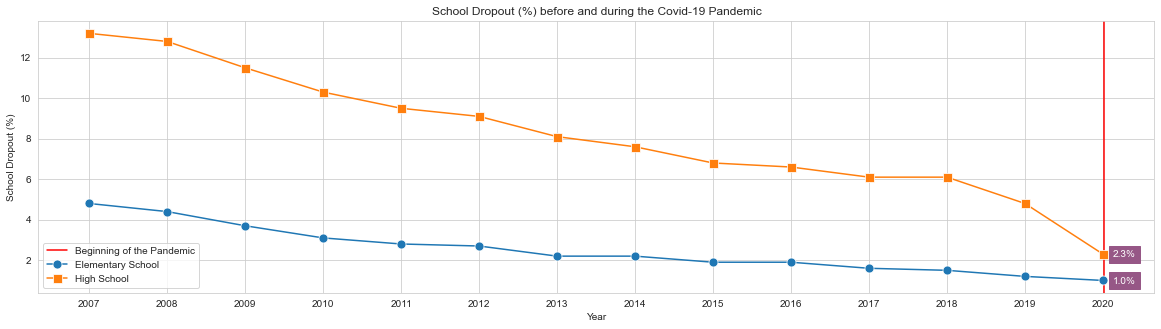

In [179]:
plt.figure(figsize=(20,5))
sns.set_style("whitegrid")
plt.axvline(x=2020.01, label="Beginning of the Pandemic", color='red', linestyle='-')
ax = sns.lineplot(data=totals, x='Ano', y='Total - EF', label="Elementary School", marker="o", markersize=markersize)
ax.set(xticks=totals.Ano.values)
sns.lineplot(data=totals, x='Ano', y='Total - EM', label="High School", marker="s", markersize=markersize)
plt.title("School Dropout (%) before and during the Covid-19 Pandemic")
plt.ylabel("School Dropout (%)")
plt.xlabel("Year")
y_2020_EM = totals[totals.Ano == 2020]['Total - EM'].iloc[0]
plt.text(2020+x_shift, y_2020_EM-y_shift, '{:.1f}%'.format(y_2020_EM), color='white').set_backgroundcolor('#965786')
y_2020_EF = totals[totals.Ano == 2020]['Total - EF'].iloc[0]
plt.text(2020+x_shift, y_2020_EF-y_shift, '{:.1f}%'.format(y_2020_EF), color='white').set_backgroundcolor('#965786')
plt.legend()
plt.show()

* We can see a higher decrease in High School Rates during the Covid-19 Pandemic then in Elementary School Rates;
* But with this line chart visualization of the actual data it is not clear if this decrease is below the tendency of each case;
* The question does not mention a separate evaluation of each education level, but a general one;
* We chose to keep separate lines for each education level because an Arithmetic Avarage of the Dropout Rates is not equivalent of a global Dropout Rate calculated with the sum of total numbers of *Approved* and *Disapproved* students divided by the sum of total *Remaining* enrolled students of each education level. Since we do not have this information available, only the *ApprovalRate*, *DisapprovalRate* and *DropoutRate* of each education level.

Example of combining percentages: <http://jwilson.coe.uga.edu/EMT725/Percentages/Percentages.html><br />

Ao final do ano letivo o aluno matriculado é avaliado quanto ao preenchimento dos requisitos de aproveitamento e freqüência, podendo ser considerado aprovado, reprovado ou afastado por abandono. O Censo Escolar ocorre no início do ano letivo. Sendo assim, a informação de matrícula inicial refere-se ao mesmo ano do Censo, enquanto as informações de rendimento e movimento escolar só são apuradas no Censo Escolar do ano seguinte, já que ficam disponíveis somente no encerramento do ano letivo. Em alguns casos há inconsistência entre essas duas informações, em função da utilização de levantamentos ocorridos em momentos distintos. Para superar esse problema foi estabelecido um algorítimo, apresentado no Anexo I desse documento. 

Reclassificação é um processo que pode ocorrer no decorrer do ano letivo, no qual o aluno que ingressa em uma determinada série pode ser remanejado, em função de uma avaliação prévia, para uma série mais avançada, diversa da série correspondente à sua matrícula inicial. Este aluno é avaliado na série para a qual ele foi remanejado, recebendo a condição de aprovado, reprovado ou afastado por abandono.

## Ploting a linear regression line of the data

In [183]:
# Constant
markersize=30

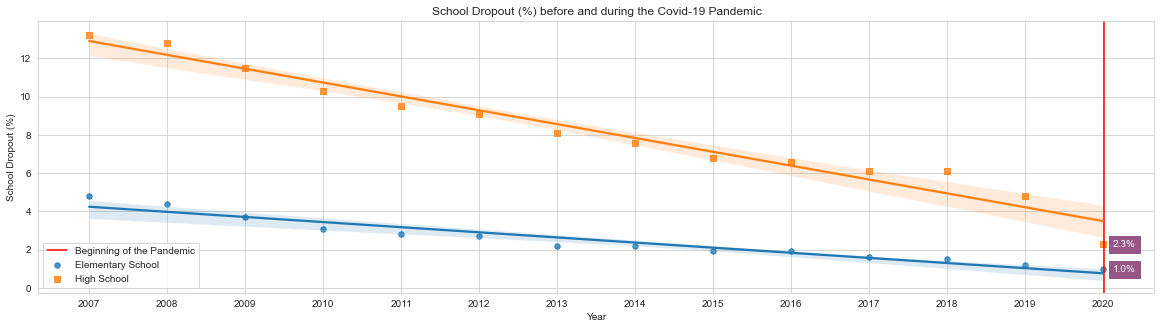

In [184]:
plt.figure(figsize=(20,5))
plt.axvline(x=2020.01, label="Beginning of the Pandemic", color='red', linestyle='-')
sns.set_style("whitegrid")
ax = sns.regplot(data=totals, x='Ano', y='Total - EF', label="Elementary School", marker="o", scatter_kws={'s':markersize})
ax.set(xticks=totals.Ano.values)
sns.regplot(data=totals, x='Ano', y='Total - EM', label="High School", marker="s", scatter_kws={'s':markersize})
plt.title("School Dropout (%) before and during the Covid-19 Pandemic")
plt.ylabel("School Dropout (%)")
plt.xlabel("Year")
y_2020_EM = totals[totals.Ano == 2020]['Total - EM'].iloc[0]
plt.text(2020+x_shift, y_2020_EM-y_shift, '{:.1f}%'.format(y_2020_EM), color='white').set_backgroundcolor('#965786')
y_2020_EF = totals[totals.Ano == 2020]['Total - EF'].iloc[0]
plt.text(2020+x_shift, y_2020_EF-y_shift, '{:.1f}%'.format(y_2020_EF), color='white').set_backgroundcolor('#965786')
plt.legend()
plt.show()